# ***e_commerce_customer_support_analysis***

In [4]:
# Import necessary libraries
import pandas as pd
import requests

# Load the dataset
dataset_url = "hf://datasets/NebulaByte/E-Commerce_Customer_Support_Conversations/data/train-00000-of-00001-a5a7c6e4bb30b016.parquet"
df = pd.read_parquet(dataset_url)

df.head()

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi..."
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...


In [7]:
df.describe()

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,6,40,109,109,4,3,50,3,3,3,998
top,Cancellations and returns,Return and Exchange,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Vacuum Cleaner,less,junior,"handles customer inquiries independently, poss...","Agent: You're welcome, Jane. Have a great day!"
freq,286,95,17,17,552,465,28,488,507,507,3



Insight 1: Issue Complexity Distribution
issue_complexity
less      488
medium    426
high       86
Name: count, dtype: int64


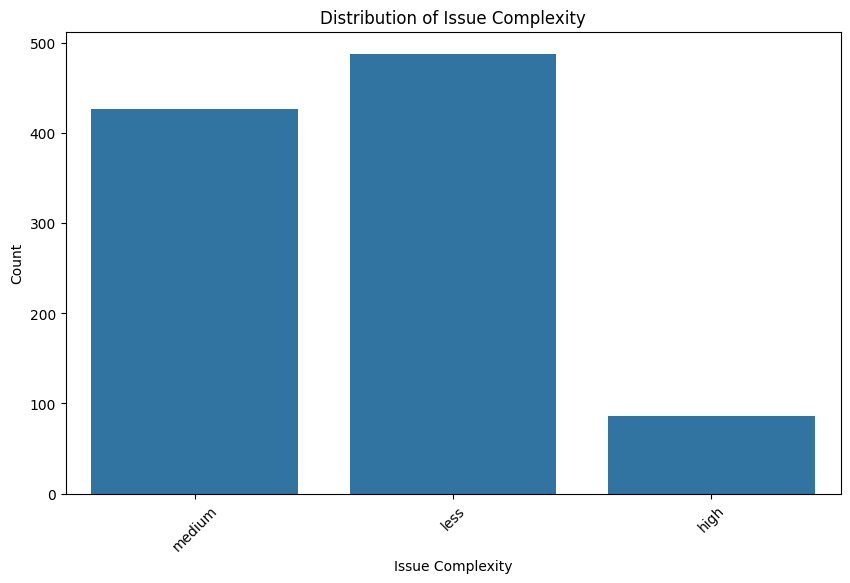

In [18]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Insight 1: Distribution of issue complexities
issue_complexity_distribution = df['issue_complexity'].value_counts()
print("\nInsight 1: Issue Complexity Distribution")
print(issue_complexity_distribution)

# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='issue_complexity', data=df)
plt.title('Distribution of Issue Complexity')
plt.xlabel('Issue Complexity')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [12]:
# Insight 2: Correlation between agent experience level and issue complexity
agent_experience_correlation = df.groupby(['agent_experience_level', 'issue_complexity']).size().unstack(fill_value=0)
print("\nInsight 2: Agent Experience Level vs Issue Complexity")
agent_experience_correlation



Insight 2: Agent Experience Level vs Issue Complexity


issue_complexity,high,less,medium
agent_experience_level,,,
experienced,31,171,146
inexperienced,9,71,65
junior,46,246,215


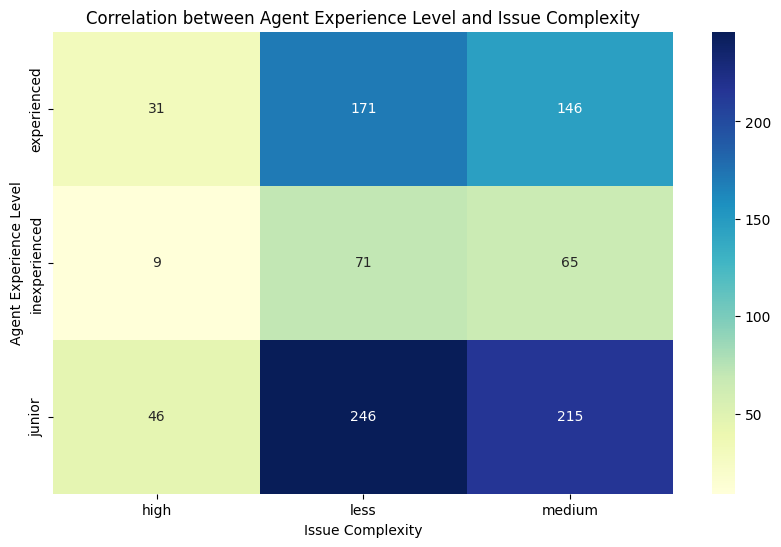

In [20]:
# prompt: Visualize The correlation btw experience level and issue complexity in a heatmap and try to get a meaningfull conclusion

import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Insight 2: Correlation between agent experience level and issue complexity (with Heatmap)
agent_experience_correlation = df.groupby(['agent_experience_level', 'issue_complexity']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(agent_experience_correlation, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Correlation between Agent Experience Level and Issue Complexity')
plt.xlabel('Issue Complexity')
plt.ylabel('Agent Experience Level')
plt.show()


In [11]:
# Insight 3: Customer sentiment distribution across issue categories
sentiment_category_distribution = df.groupby(['customer_sentiment', 'issue_category']).size().unstack(fill_value=0)
print("\nInsight 3: Customer Sentiment Distribution by Issue Category")
sentiment_category_distribution


Insight 3: Customer Sentiment Distribution by Issue Category


issue_category,Accessing Warranty Details,Account Reactivation and Deactivation,Account and Shopping,Adding and Changing Account Information,Availability of Faster Delivery Options,Book Pricing Discrepancies,Cash on Delivery (CoD) Refunds,Contacting Seller's Partnered Courier Service Providers,Delivery Process,Expedited Delivery,...,Product Registration and Warranty,Replacement and Return Process,Return Checks and Fees,Return and Exchange,Returns and Refunds,Shipping Options for Returns,Standard Shipping Speeds and Delivery Charges,Start Date of Warranty,Warranty Claim Process,Warranty Terms and Changes
customer_sentiment,,,,,,,,,,,,,,,,,,,,,
frustrated,0,0,0,0,0,0,12,0,0,0,...,0,0,0,20,9,0,0,0,0,0
negative,0,14,6,0,18,0,9,0,0,0,...,3,11,12,35,20,0,7,0,0,5
neutral,15,6,20,24,0,10,8,5,6,12,...,8,47,16,40,8,10,8,9,17,8
positive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


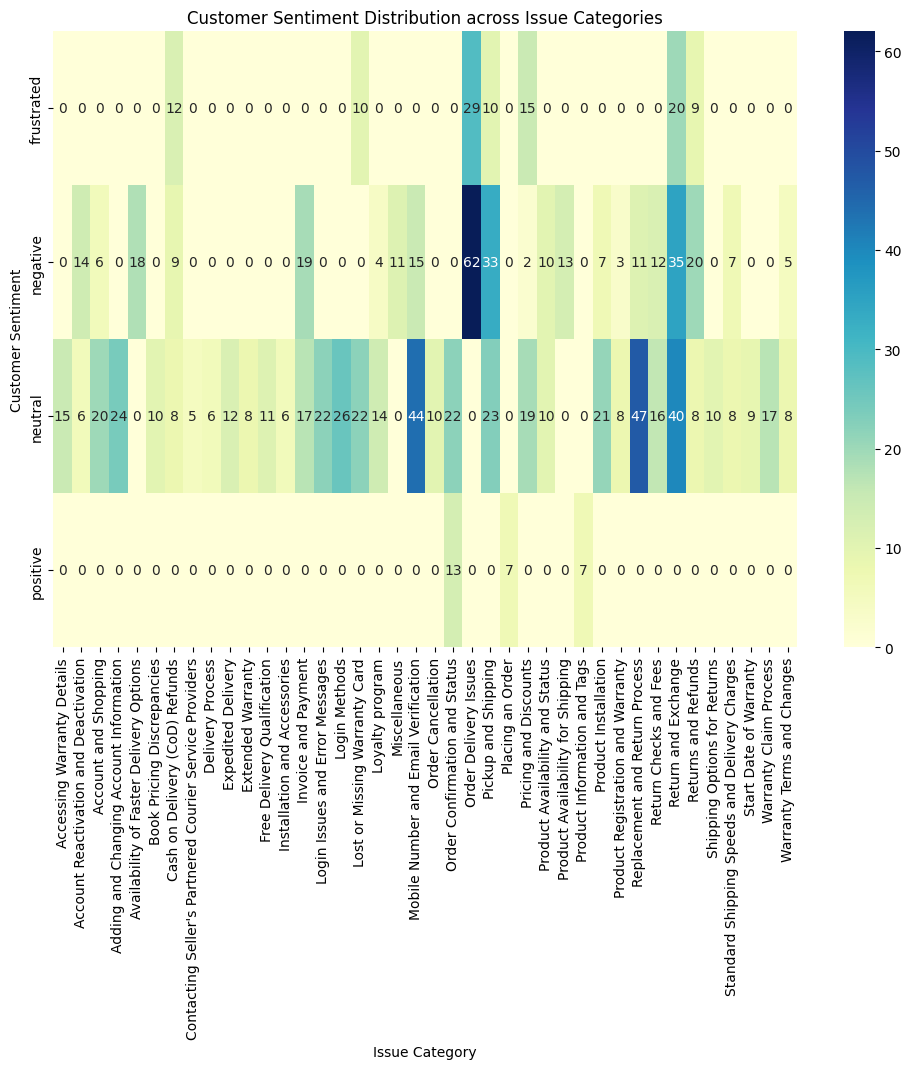

In [26]:

sentiment_category_distribution = df.groupby(['customer_sentiment', 'issue_category']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_category_distribution, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Customer Sentiment Distribution across Issue Categories')
plt.xlabel('Issue Category')
plt.ylabel('Customer Sentiment')
plt.show()